<a href="https://colab.research.google.com/github/cddaaaa1/deep-learning-course/blob/master/02_CNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks

This tutorial addresses the basic concepts regarding Convolutional Neural Networks and their implementation using the Keras framework.
Convolutional Neural Networks (CNNs) are a class of feed-forward artificial neural architecture. They are applied to analyse visual 2D imagery, meaning that we can feed images directly into a CNN without the need to flatten them into a 1D vector as done in the previous tutorial.
CNNs have revolutionised the field of computer vision in the last decade. In 2012 Alex Krizhevsky introduced the AlexNet architecture to win the ImageNet Challenge (one of the most important competitions on image classification within the Computer Vision community), by reducing the top-5 error more than 10 percentage points, which was an incredible improvement at that time. As of now, CNNs are used not only on image classification but in many other computer vision tasks.

![](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2017/03/alexnet_small-1.png)

The image above is from [cv-tricks' blog](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/) and shows the proposed AlexNet architecture. It is composed of 5 convolutional layers followed by 3 fully connected layers. Nowadays, we can find much deeper and more complex architectures, which outperform AlexNet on the ImageNet Challenge.







## CNN Structure

The basic pipeline of common CNNs consists of an image as input and a stack of convolutional layers that extract a feature representation from the input image. The final shape of the image representation is conditioned on the type of problem/task that the architecture is facing. For instance, the output of the last layer in a classification problem is a probability vector. Each dimension of the probability vector represents how likely is that the input image belongs to a specific class. However, the architecture design is up to us, and therefore, we could code a network that outputs a single value for regression problems, or that generates a new image map for semantic segmentation. Now, let's dig in a bit into CNN and introduce some layers that are widely used.

### 2D Convolutional Layer

The most common layer in any CNN architecture is the 2D convolutional layer. Convolutional layers are specifically designed to extract features from images or even extract features from previously extracted features. As shown in the following illustration, 2D convolutions apply the same filter to the full image. And therefore, due to its nature, 2D convolutional filters exploit the local information presented in images, making them a powerful tool for image analysis.

![](https://cdn-images-1.medium.com/max/800/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Image [source](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1).

The latest deep learning frameworks have made possible the integration of convolutional layers easily on our architectures with only a single line of code. We will address here how 2D convolutions work since full understanding is needed to comprehend how any CNN operates. The following images and some explanations can be further explored on the original [Irhum Shafkat's blog](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) or in the [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) book. Both are strongly recommended.

To understand 2D convolutions, we need to define first what a kernel is. Kernels are simply matrices of numbers. The numbers on the kernels are the so-called weights, and the weights on the kernels change as we train the network. Hence, network training aims to optimise the network's parameters (update the kernel weights) such that the cost function is minimised.

The 2D convolution operation takes the network's kernels and "slides" them over the input image (alike to a sliding window) as in the following image from [PyImageSearch](https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/) blog:

![](https://pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif)

In each step, the network performs an element-wise multiplication with the elements that are currently on. The results of this elementwise multiplication are added to obtain the output value of the operation. CNNs repeat previous step for all the positions of the sliding window, composing at the end the feature map. This generated feature map can go through another 2D convolutional layer and create more powerful features.

>

![](https://cdn-images-1.medium.com/max/800/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

>
The previous image shows the 2D convolution operation. Thus, the new feature values are the weighted sum of all the elements in the sliding window after the elementwise multiplication between input and kernel.  The bigger the size of the kernel is, the more feature elements contribute to the final output value. In contrast to fully connected layers, where a new feature value is a weighted sum over **all** input values, as mentioned, 2D convolutions compute features based on local areas. In other words, instead of looking at every input component, they consider only features coming from close locations.

In the above example, the input image on the left has a size of 5x5 and the dimension of the resulting feature map is 3x3, showing that the size of the output maps is not always equal to the input. Hence, the output size can be computed by doing:

$O = W - K + 1$,

where $O$ is the output height/length, $W$ is the input height/length and $K$ is the kernel size. The output size is not only conditioned on the input size but also on the kernel size. Check in the following code cell how the output feature map shape changes as you increase the kernel size. In Keras, we define the layer by using `Conv2D` from `keras.layers` (documentation [here](https://keras.io/layers/convolutional/#conv2d)).









In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1)))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (98, 98)


Moreover, the kernel size and the input size are not the only parameters affecting the output size. We are going to introduce two extra elements that change the size of the output map: the padding and the stride.

### Adding Padding to Input Features

In some tasks, such as [image translation](https://arxiv.org/pdf/1611.07004.pdf), we need the output size to be equal to the input size. The solution to that is using padding, where extra edges are added to the input features so that the dimension is not reduced after the convolutional layer. Normally those pixels have $0$ value (termed zero-padding), but depending on the application other methods could be used, e.g., reflection or symmetric padding.

![](https://cdn-images-1.medium.com/max/800/1*1okwhewf5KCtIPaFib4XaA.gif)

If padding is used, the new output size can be computed by doing:

$O = W - K + 2P+ 1$,

where $P$ is the padding value. $P$ must be set in concordance with the kernel size if dimensionality wants to be preserved. Padding can be added to the `Conv2d` layer in Keras by using the padding argument and selecting one of the two settings: `valid`, which is the default value and means no padding; and `same`, which adapts the padding value to have the same output size as input size.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (100, 100)


### Using Stride in Convolutional Layers

The stride operation allows the convolutional layers to skip some of the sliding windows explained above. Hence, instead of jumping one pixel apart, we can define the number of skipped elements before computing the weighting sum between the kernel's weights and input features. A stride of 1 means that features will be extracted from all windows a pixel apart, so basically, every single window is computed. A stride of 2 means that we are selecting windows 2 pixels apart, skipping every other window in the process. Strides reduce the number of computations and consequently the size of the output map. In practice, as we go deeper into the CNN, the spatial size of the feature map gets smaller while the number of channels increases. Moreover, we can further reduce the size of the feature map using pooling operations, which we introduce later in this tutorial.

![](https://cdn-images-1.medium.com/max/800/1*BMngs93_rm2_BpJFH2mS0Q.gif)

If strides are used, the new output size can be computed as:

$O = \dfrac{W - K + 2P}{S}+ 1$,

where $S$ is the stride value. The stride is set in the layer by using the `strides` argument.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 1))

# input: 100x100 image with 1 channels -> (100, 100, 1) tensor.
# this applies 1 convolution filter of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=2 applies applies stride of 2
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(100, 100, 1), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:})'.format(input_feature.shape[1], input_feature.shape[2]))
print('Output size: ({:}, {:})'.format(output_feature.shape[1], output_feature.shape[2]))

Input size: (100, 100)
Output size: (50, 50)


## Differences Between Kernel and Filters

The examples above take as input a single-channel image and compute a feature map with also one channel. However, when dealing with RGB images or feature maps, the input is no longer a single-channel map but, instead, they can have multiple channels. In the case of an RGB image, for each 2D convolution, we will need to define 3 kernels to interact with each of the image's channel colours. This group of kernels is called a filter. Thus, a filter is a collection of kernels that produces a single output.

As a regular practice when defining Deep Learning models, we increase the number of filters in each convolutional layer as we go deeper into the model. Due to the element-wise multiplication, the number of kernels on each filter must be the same that the number of channels in the input feature map. Keras already deals with the number of kernels inside each filter. Keras keeps track of the input size in each convolutional layer unlike other frameworks (Pytorch or TensorFlow). Hence, in Keras, we must only decide the number of filters (output channels) in each layer.

The next figure shows how the convolution is performed when having three input channels. First, one filter uses its three independent kernels to convolve with the RGB channels of the input image:

![](https://cdn-images-1.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

Next, each of the processed feature maps is added together to obtain a single channel:

![](https://cdn-images-1.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

Finally, we add the bias term to obtain the feature map. There is a single bias for the full output channel map. This operation is repeated for all the filters inside the convolutional layer.

Now, we show how to use a `Conv2D` layer that takes an input image with 3 channels and generates an output map with 32 channels.


In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=2 applies applies stride of 2
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=2))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

Input size: (100, 100, 3)
Output size: (50, 50, 32)


## Activation Functions

As seen in previous tutorials, after a `Dense` layer we usually can find an activation function. We introduce here how to use them after `Conv2D` layers. Those activation functions are a set of operators that maps the feature values to a new set of values, the mapping depends on the function at hand. The main reason for using activation functions is that they add non-linearities to the network, giving more expressive power to the network, which will be able to reproduce more complex functions.


The complete list of activation functions that Keras offers can be found [here](https://keras.io/activations/). We introduce here some of them:

*  **Sigmoid Function** sets the output in the range (0, 1). The sigmoid function is widely used in binary classification problems since its output can be taken as a probability value. `keras.activations.sigmoid(x)`:

>![](https://i.ibb.co/Ph8dsTv/sigmoid.png)

*  **Tanh Function** is a logistic function as sigmoid, but the range of the tanh function is (-1, 1). Contrary to sigmoid function, where the values close to 0 are set around 0.5, in the tanh function they will be still mapped around the 0 value. `keras.activations.tanh(x)`:

>![](https://i.ibb.co/68g7LpL/tanh.png)

*  **ReLU Function** is the most common activation function you can find in any current CNN as in general works better than the rest. The range of this function is in \[0, inf). It sets all negative values to 0 and hence is computationally easy to implement. As a drawback, during training some neurons *die*, meaning that the output is 0 for all available data points and no gradient is propagated there. `keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)`:

>![](https://i.ibb.co/Zd9H8Z4/relu.png)

*  **LeakyReLU Function** is a modified version of the ReLU activation above, which attempts to solve the problem of dying neurons that ReLU has. While ReLU does not backpropagate negative values, Leaky ReLU smooths those values without setting them to 0. That allows the gradients to backpropagate through the network even for negative values. `keras.layers.LeakyReLU(alpha=0.3)`:

>![](https://i.ibb.co/dmnJ6h1/leakyrelu.png)

*  **Softmax Function** is another widely activation function for multi-class classification problems and usually is employed as the last activation function in the classification model. This function sets all of the output elements to the range (0, 1). However, the softmax function does not take independently the input values to map it into its probability value. Softmax Function takes an un-normalized vector, $s$, and normalizes it into a probability distribution, $p$, following the softmax expression. As the output is a probability, the output elements add up to 1. `keras.activations.softmax(x, axis=-1)`. Thus, the output value $p_i$ is computed as:

> $p_{i} = \dfrac{e^{s_i}}{\sum_{\substack{j}}^{N} e^{s_j}}$

The following example shows the feature maps before and after of the ReLU activation function. All values that are negative are set to 0 after the activation function.




In [ ]:
import numpy as np
import keras
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation

# Generate dummy data
input_feature = np.random.random((1, 3, 3, 1)) - 0.5

# input: 3x3 image with 1 channel -> (3, 3, 1) tensor.
# This applies a 1 convolution filter of size 3x3 each.
# This applies a ReLU activation function
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(3, 3, 1), padding='same', strides=1, name='conv'))
model.add(Activation('relu'))

model_before_ReLU = Model(inputs=model.input, outputs=model.get_layer('conv').output)

output_feature = model_before_ReLU.predict(input_feature)
output_ReLu_feature = model.predict(input_feature)

print('Output Network without activation function')
print(output_feature)

print('')
print('Output Network after ReLU activation function')
print(output_ReLu_feature)


Output Network without activation function
[[[[ 0.23390736]
   [ 0.2609628 ]
   [-0.10049579]]

  [[ 0.47150436]
   [ 0.01826818]
   [-0.0576808 ]]

  [[ 0.08542764]
   [ 0.02355585]
   [ 0.09083541]]]]

Output Network after ReLU activation function
[[[[0.23390736]
   [0.2609628 ]
   [0.        ]]

  [[0.47150436]
   [0.01826818]
   [0.        ]]

  [[0.08542764]
   [0.02355585]
   [0.09083541]]]]


## Pooling Layer

It is a common practice to insert a pooling layer between convolutional layers in CNNs. In a standard CNN architecture, we set the feature sizes to become smaller progressively to reduce the computation in the networks, and to merge the information from different spatial locations. To reduce the feature map sizes, we can either use bigger stride size in the convolutional layers or we can use pooling layers. Pooling layers perform a spatial sliding window and apply an operation to reduce the spatial size. Those operations vary depending on the architecture, being the max, mean and min pooling the most typical ones. Here, we will explain the max pooling, although all the others work similarly. Max pooling keeps only the max value in a neighbourhood, where the neighbourhood is defined by the size of the kernel. Let's visualise it, the next example shows the result of a Max Pooling layer with a 2x2 kernel and a stride of 2.

![](https://i.ibb.co/Xp454S4/MaxPool.png)

As in convolutional layers, the final size is conditioned to the stride size of the pooling layer. However, contrary to convolutional layers, pooling layers operate independently on each of the input channels, without modifying the depth of the feature maps. To add max pooling to our model we need to import `MaxPooling2d` from `keras.layers` and define the stride and pooling size.

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D

# Generate dummy data
input_feature = np.random.random((1, 100, 100, 3))

# input: 100x100 image with 3 channels -> (100, 100, 3) tensor.
# this applies 32 convolution filters of size 3x3 each.
# attribute padding='same' applies zero-padding to the input feature map
# attribute strides=1 applies applies stride of 1
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same', strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

output_feature = model.predict(input_feature)

print('Input size: ({:}, {:}, {:})'.format(input_feature.shape[1], input_feature.shape[2], input_feature.shape[3]))
print('Output size: ({:}, {:}, {:})'.format(output_feature.shape[1], output_feature.shape[2], output_feature.shape[3]))

Input size: (100, 100, 3)
Output size: (50, 50, 32)


# Example: Classification on MNIST

As opposed to the *Introduction to Keras* tutorial, in this section, we show how to perform image classification when the input data is a 2D image instead of a flat 1D vector.

As discussed above, Convolutional Neural Networks aim to extract and exploit the local relationships on 2D maps, hence, CNNs are much more convenient for images than Multi-layer Perceptron models.

First of all, we load the MNIST dataset from Keras' framework. The definition of the data is almost identical than in the Keras tutorial, although this time we are not reshaping the input images into a 1D vector.

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

# the data, shuffled and split between train and test sets
# Here we are using the official test set as our validation set, in further
# tutorials, test and validation splits will be explained properly.
# Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

shape = x_train.shape

# Normalize and reshape the input images
x_train = np.expand_dims(x_train.astype('float32'), -1)
x_test = np.expand_dims(x_test.astype('float32'), -1)

x_train /= 255
x_test /= 255

y_train_class = np_utils.to_categorical(y_train, 10)
y_test_class = np_utils.to_categorical(y_test, 10)

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
Image shape: (28, 28, 1)
Total number of training samples: 60000
Total number of validation samples: 10000


As illustrated in the cell, this time the input image before the model is 28x28x1.

Now we can define a model composed of convolutional layers, activation functions, and maxpool operators:

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

As explained in the previous tutorial, in a classification problem, the output of the model is a probability vector. Each dimension of the vector indicates how likely is that the input image belongs to a specific class.

Up to now, the resulting feature map of the model is a map with the shape *Batch x Weight' x Height' x Channel*, and it needs to be mapped into a vector with shape *Batch x Num Classes*. A common technique to process this mapping is to add a Flatten layer that will reshape the feature map to *Batch x (Weight' * Height' * Channel)*. Following the Flatten layer, we add a dense layer which maps this new feature map to the desired output size.

In [ ]:
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

Let's visualize the output shape in each layer.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

Finally, we can train our CNN and check its performance on MNIST.

In [ ]:
# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train_class, batch_size=32, epochs=10,  verbose=0)

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.08394194394350052
Validation accuracy: 0.9743000268936157


# Coursework


## Task 1: Classification

At this point, we know what is a CNN, how they work, and the components needed to design them. In this first task, we want you to create a CNN that is able to outperform the Multi-layer Perceptron model from Tutorial 1. For the first part of the coursework, we train on CIFAR10, a  classical dataset for image classification. Note that in these tutorials, we mainly use the official test sets of several standard datasets as our validation data. The reason we use the given test sets as validation data for the tutorials is that is an easy way to make sure that we all work with the same split and report results using the same data. However, in a proper machine learning setup, your validation set should be separate from the test set, so you can tune the model/parameters on the validation set and then check the final performance in the test set. Thus, even though the variables are `x_test` and `y_test`, they represent our validation set.

Let's first load the dataset and visualise some examples:

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000


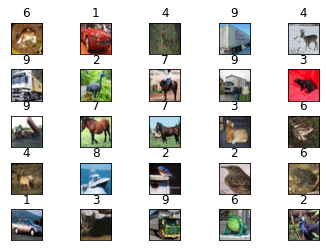

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop

# the data, shuffled and split between train and test sets
# Here we are using the official test set as our validation set, in further
# tutorials, test and validation splits will be explained properly.
# Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

# Let's visualize some examples
N=5
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

CIFAR10 contains 50,000 32x32 color training images, labeled over 10 categories and 10,000 test images. As mentioned, we use those test images as our validation set in this tutorial. We need to preprocess the images for the 1D neural network defined in the previous tutorial:

In [ ]:
# Preprocess dataset for a 1D neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the image
X_train /= 255
X_test /= 255

X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]*3)
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]*3)

print('New X_train shape: {0}'.format(X_train_flatten.shape))

Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))


New X_train shape: (50000, 3072)
New Y_train shape: (50000, 10)


Now, we are ready to define the Multi-layer Perceptron model and train it.

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train_flatten.shape[1:])))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# initiate RMSprop optimizer
opt = RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=20)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0479 - accuracy: 0.2362
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7793 - accuracy: 0.3563
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6936 - accuracy: 0.3909
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6421 - accuracy: 0.4085
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5967 - accuracy: 0.4245
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5629 - accuracy: 0.4399
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5393 - accuracy: 0.4471
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5119 - accuracy: 0.4595
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4797 - accuracy: 0.4699
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.468

### Problem Definition

In this exercise, you are asked to test several CNN architectures in the code provided below. Do not modify the optimizer, loss used or parameters related to the training such as the learning rate, they will be investigated in future tutorials. You must focus on the architecture itself: number of convolutional layers, number of filters in every layer, activation functions, pooling operators, among others. Batch Normalization and Dropout layers, which are quite used in CNN architectures, will be also investigated in a future tutorial so you do not have to discuss them.


**Report**:
*   Present a bar figure with the training and validation accuracies for different design choices. Discuss only the parameters that have a significant influence on the network's performance. Explain any discrepancy between training and validation accuracies.
*   Present a sketch that introduces your best architecture. See some examples on how to display networks in [cv-tricks' blog](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/).


In [ ]:
# import tensorflow as tf
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.utils import np_utils
# from keras.datasets import cifar10
# from keras.optimizers import RMSprop
# from keras.layers import Conv2D, MaxPooling2D, Flatten

# # the data, shuffled and split between train and val sets
# # Here we are using the official test set as our validation set, in further
# # tutorials, test and validation splits will be explained properly.
# # Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print('Image shape: {0}'.format(x_train.shape[1:]))
# print('Total number of training samples: {0}'.format(x_train.shape[0]))
# print('Total number of validation samples: {0}'.format(x_test.shape[0]))

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# # Normalize the image
# x_train /= 255
# x_test /= 255

# y_train_class = np_utils.to_categorical(y_train, 10)
# y_test_class = np_utils.to_categorical(y_test, 10)


# # . . .


# # Define here your architecture


# # . . .


# # initiate RMSprop optimizer
# opt = RMSprop(lr=0.0001, decay=1e-6)

# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model.fit(x_train, y_train_class, batch_size=32, epochs=20)

# score = model.evaluate(x_test, y_test_class, verbose=0)
# print('Validation loss:', score[0])
# print('Validation accuracy:', score[1])

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import RMSprop

# the data, shuffled and split between train and val sets
# Here we are using the official test set as our validation set, in further
# tutorials, test and validation splits will be explained properly.
# Hence, even though the variables are `x_test` and `y_test`, they represent our validation set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Image shape: {0}'.format(x_train.shape[1:]))
print('Total number of training samples: {0}'.format(x_train.shape[0]))
print('Total number of validation samples: {0}'.format(x_test.shape[0]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the image
x_train /= 255
x_test /= 255

y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

# Define the CNN architecture
model = Sequential()

# First convolutional layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layer
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_class, batch_size=32, epochs=20)

# Evaluate the model
score = model.evaluate(x_test, y_test_class, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
New Y_train shape: (50000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2169 - loss: 2.1449
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3697 - loss: 1.8130
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4201 - loss: 1.6643
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4477 - loss: 1.5862
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4623 - loss: 1.5270
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4777 - loss: 1.4942
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4895 - loss: 1.4573
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5083 - loss: 1.4129
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5153 - loss: 1.3892
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5262 - loss: 1.3620
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5329 - loss: 1.3372
Epoch 12/20
1563/1563 ━━━━━━━━

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, LeakyReLU
from keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [24]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize and preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

# Function to create and train a model
def create_and_train_model(architecture_name, model_fn, epochs=10, batch_size=32):
    print(f"\nTraining {architecture_name}...")

    # Create a new optimizer for each model
    opt = RMSprop(learning_rate=0.0001, decay=1e-6)

    # Build and compile the model
    model = model_fn()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #apply early_stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model and collect training history
    history = model.fit(
        x_train, y_train_class,
        batch_size=batch_size,
        epochs=epochs,
        callbacks = [early_stopping],
        validation_data=(x_test, y_test_class),
        verbose=1
    )

    # Save the model
    model.save(f"/content/drive/MyDrive/{architecture_name}.h5")
    print(f"{architecture_name} saved as {architecture_name}.h5")

    # Return training and validation accuracies
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    return train_acc, val_acc

# Define the architectures
def architecture_0():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# Other architectures (architecture_1 to architecture_5) remain the same
def architecture_1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_3():
    model = Sequential()
    model.add(Conv2D(32, (2, 2), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_4():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    # model.add(Activation(tf.keras.layers.LeakyReLU(alpha=0.1)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    # model.add(Activation(tf.keras.layers.LeakyReLU(alpha=0.1)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_5():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# Collect results
results = {}
architectures = {
    "Architecture 0": architecture_0,
    "Architecture 1": architecture_1,
    "Architecture 2": architecture_2,
    "Architecture 3": architecture_3,
    "Architecture 4": architecture_4,
    "Architecture 5": architecture_5,
}

for name, model_fn in architectures.items():
    train_acc, val_acc = create_and_train_model(name, model_fn, epochs=10)
    results[name] = {'train_acc': train_acc, 'val_acc': val_acc}

# Plot the results
names = list(results.keys())
train_accuracies = [results[name]['train_acc'] for name in names]
val_accuracies = [results[name]['val_acc'] for name in names]

plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training Accuracy = {metrics['train_acc']:.4f}, Validation Accuracy = {metrics['val_acc']:.4f}")



Training Architecture 0...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2232 - loss: 2.1522 - val_accuracy: 0.3684 - val_loss: 1.8161
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3787 - loss: 1.7885 - val_accuracy: 0.4191 - val_loss: 1.6676
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4223 - loss: 1.6568 - val_accuracy: 0.4468 - val_loss: 1.5793
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4482 - loss: 1.5811 - val_accuracy: 0.4641 - val_loss: 1.5298
Epoch 5/10
1555/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.5200

KeyboardInterrupt: 


Training Architecture 0...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2181 - loss: 2.1601 - val_accuracy: 0.3357 - val_loss: 1.9084
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3431 - loss: 1.8791 - val_accuracy: 0.3925 - val_loss: 1.7646
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4015 - loss: 1.7318 - val_accuracy: 0.4288 - val_loss: 1.6325
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4326 - loss: 1.6198 - val_accuracy: 0.4521 - val_loss: 1.5562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4542 - loss: 1.5582 - val_accuracy: 0.4685 - val_loss: 1.5102
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4724 - loss: 1.5076 - val_accuracy: 0.4762 - val_loss: 1.4721
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4845 - loss: 1.4653 - val_accuracy: 0.4977 - val_loss: 1.4354
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5000 - loss: 1.4303 - 

Architecture 0 saved as Architecture 0.h5

Training Architecture 6...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1691 - loss: 2.2401 - val_accuracy: 0.3351 - val_loss: 1.8796
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3426 - loss: 1.8221 - val_accuracy: 0.3822 - val_loss: 1.7166
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3845 - loss: 1.7024 - val_accuracy: 0.4081 - val_loss: 1.6437
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4143 - loss: 1.6383 - val_accuracy: 0.4289 - val_loss: 1.5948
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4265 - loss: 1.5975 - val_accuracy: 0.4379 - val_loss: 1.5500
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4448 - loss: 1.5488 - val_accuracy: 0.4461 - val_loss: 1.5298
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4542 - loss: 1.5246 - val_accuracy: 0.4557 - val_loss: 1.4898
Epoch 8/10
1563/1563

Architecture 6 saved as Architecture 6.h5

Training Architecture 7...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2414 - loss: 2.0749 - val_accuracy: 0.4197 - val_loss: 1.6532
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4258 - loss: 1.6206 - val_accuracy: 0.4602 - val_loss: 1.5075
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4632 - loss: 1.4892 - val_accuracy: 0.4891 - val_loss: 1.4497
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4968 - loss: 1.4148 - val_accuracy: 0.4998 - val_loss: 1.3937
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5255 - loss: 1.3496 - val_accuracy: 0.5336 - val_loss: 1.3129
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5389 - loss: 1.3112 - val_accuracy: 0.5413 - val_loss: 1.2913
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5568 - loss: 1.2700 - val_accuracy: 0.5545 - val_loss: 1.2538
Epoch 8/10
1563/1563

Architecture 7 saved as Architecture 7.h5

Training Architecture 8...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2973 - loss: 1.9604 - val_accuracy: 0.4467 - val_loss: 1.5547
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4613 - loss: 1.5106 - val_accuracy: 0.5084 - val_loss: 1.3732
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5197 - loss: 1.3594 - val_accuracy: 0.5342 - val_loss: 1.3308
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5530 - loss: 1.2729 - val_accuracy: 0.5294 - val_loss: 1.3116
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5772 - loss: 1.2068 - val_accuracy: 0.5810 - val_loss: 1.1949
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6028 - loss: 1.1421 - val_accuracy: 0.6028 - val_loss: 1.1327
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6232 - loss: 1.0809 - val_accuracy: 0.6141 - val_loss: 1.0840
Epoch 8/10
1563/1563

Architecture 8 saved as Architecture 8.h5

Training Architecture 9...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2896 - loss: 1.9511 - val_accuracy: 0.4487 - val_loss: 1.5401
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4727 - loss: 1.4835 - val_accuracy: 0.5241 - val_loss: 1.3420
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5315 - loss: 1.3163 - val_accuracy: 0.5723 - val_loss: 1.1998
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5788 - loss: 1.1959 - val_accuracy: 0.6035 - val_loss: 1.1382
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6146 - loss: 1.0988 - val_accuracy: 0.6234 - val_loss: 1.0732
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6405 - loss: 1.0257 - val_accuracy: 0.6486 - val_loss: 1.0194
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6728 - loss: 0.9502 - val_accuracy: 0.6029 - val_loss: 1.1451
Epoch 8/10
1563/

Architecture 9 saved as Architecture 9.h5

Training Architecture 10...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2972 - loss: 1.9310 - val_accuracy: 0.4454 - val_loss: 1.5609
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4805 - loss: 1.4571 - val_accuracy: 0.4931 - val_loss: 1.4363
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5447 - loss: 1.2855 - val_accuracy: 0.5652 - val_loss: 1.2288
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5928 - loss: 1.1607 - val_accuracy: 0.6019 - val_loss: 1.1241
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6365 - loss: 1.0532 - val_accuracy: 0.6371 - val_loss: 1.0249
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6608 - loss: 0.9745 - val_accuracy: 0.6268 - val_loss: 1.0561
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6777 - loss: 0.9164 - val_accuracy: 0.6677 - val_loss: 0.9599
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7004 - loss: 0.8709

Architecture 10 saved as Architecture 10.h5

Training Architecture 11...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1920 - loss: 2.1240 - val_accuracy: 0.3029 - val_loss: 1.9125
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3228 - loss: 1.8236 - val_accuracy: 0.3685 - val_loss: 1.7276
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3721 - loss: 1.7003 - val_accuracy: 0.3671 - val_loss: 1.7622
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3995 - loss: 1.6245 - val_accuracy: 0.3703 - val_loss: 1.7587
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4248 - loss: 1.5697 - val_accuracy: 0.4430 - val_loss: 1.5318
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4486 - loss: 1.5167 - val_accuracy: 0.4685 - val_loss: 1.4818
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4676 - loss: 1.4788 - val_accuracy: 0.4766 - val_loss: 1.4749
Epoch 8/10
1563

Architecture 11 saved as Architecture 11.h5


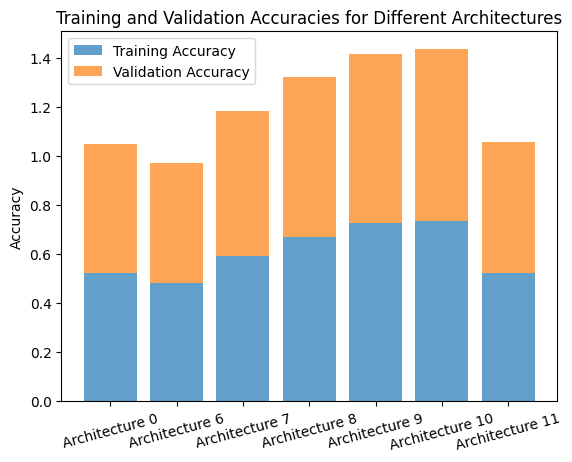


Detailed Results:
Architecture 0: Training Accuracy = 0.5232, Validation Accuracy = 0.5267
Architecture 6: Training Accuracy = 0.4829, Validation Accuracy = 0.4868
Architecture 7: Training Accuracy = 0.5927, Validation Accuracy = 0.5919
Architecture 8: Training Accuracy = 0.6709, Validation Accuracy = 0.6522
Architecture 9: Training Accuracy = 0.7279, Validation Accuracy = 0.6877
Architecture 10: Training Accuracy = 0.7346, Validation Accuracy = 0.7018
Architecture 11: Training Accuracy = 0.5203, Validation Accuracy = 0.5372


In [ ]:
# Define the architectures
def architecture_0():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_6():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_7():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model


# Other architectures (architecture_1 to architecture_5) remain the same
def architecture_8():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_9():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_10():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_11():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    # model.add(Flatten()
    model.add(GlobalAveragePooling2D())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# Collect results
results = {}
architectures = {
    "Architecture 0": architecture_0,
    "Architecture 6": architecture_6,
    "Architecture 7": architecture_7,
    "Architecture 8": architecture_8,
    "Architecture 9": architecture_9,
    "Architecture 10": architecture_10,
    "Architecture 11": architecture_11,
}

for name, model_fn in architectures.items():
    train_acc, val_acc = create_and_train_model(name, model_fn, epochs=10)
    results[name] = {'train_acc': train_acc, 'val_acc': val_acc}

# Plot the results
names = list(results.keys())
train_accuracies = [results[name]['train_acc'] for name in names]
val_accuracies = [results[name]['val_acc'] for name in names]

plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training Accuracy = {metrics['train_acc']:.4f}, Validation Accuracy = {metrics['val_acc']:.4f}")


Training Architecture 10...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2965 - loss: 1.9273 - val_accuracy: 0.4453 - val_loss: 1.5668
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4692 - loss: 1.4776 - val_accuracy: 0.5131 - val_loss: 1.3639
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5332 - loss: 1.3111 - val_accuracy: 0.5801 - val_loss: 1.1855
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5864 - loss: 1.1716 - val_accuracy: 0.5904 - val_loss: 1.1515
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6257 - loss: 1.0648 - val_accuracy: 0.6384 - val_loss: 1.0326
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6602 - loss: 0.9763 - val_accuracy: 0.6602 - val_loss: 0.9772
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6779 - loss: 0.9225 - val_accuracy: 0.6674 - val_loss: 0.9661
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6967 - loss

Architecture 10 saved as Architecture 10.h5

Training Architecture 11...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2753 - loss: 1.9555 - val_accuracy: 0.4555 - val_loss: 1.5103
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4877 - loss: 1.4127 - val_accuracy: 0.5602 - val_loss: 1.2241
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5735 - loss: 1.1978 - val_accuracy: 0.5969 - val_loss: 1.1393
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6361 - loss: 1.0265 - val_accuracy: 0.6485 - val_loss: 0.9917
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6834 - loss: 0.9055 - val_accuracy: 0.6745 - val_loss: 0.9305
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7152 - loss: 0.8087 - val_accuracy: 0.6883 - val_loss: 0.8818
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7471 - loss: 0.7271 - val_accuracy: 0.6949 - val_loss: 0.9024
Epoch

Architecture 11 saved as Architecture 11.h5

Training Architecture 12...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2958 - loss: 1.9387 - val_accuracy: 0.4305 - val_loss: 1.6143
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4672 - loss: 1.5006 - val_accuracy: 0.5129 - val_loss: 1.3786
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5247 - loss: 1.3474 - val_accuracy: 0.5552 - val_loss: 1.2442
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5721 - loss: 1.2205 - val_accuracy: 0.5813 - val_loss: 1.1780
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6051 - loss: 1.1222 - val_accuracy: 0.6257 - val_loss: 1.0556
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6351 - loss: 1.0438 - val_accuracy: 0.6415 - val_loss: 1.0102
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6620 - loss: 0.9673 - val_accuracy: 0.6441 - val_loss: 0.9937
Epoch 8

Architecture 12 saved as Architecture 12.h5


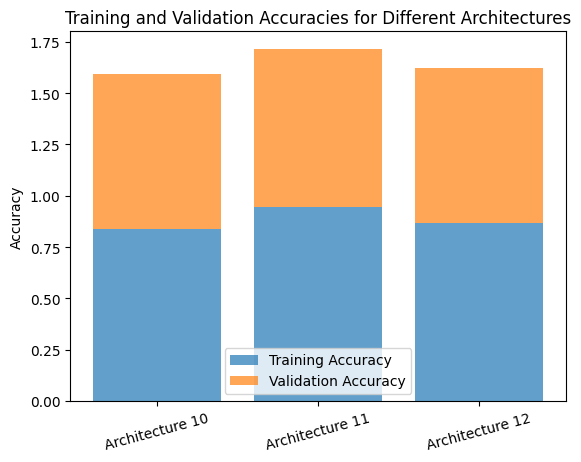


Detailed Results:
Architecture 10: Training Accuracy = 0.8395, Validation Accuracy = 0.7558
Architecture 11: Training Accuracy = 0.9464, Validation Accuracy = 0.7690
Architecture 12: Training Accuracy = 0.8654, Validation Accuracy = 0.7560


In [ ]:
# Define the architectures
def architecture_10():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_11():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_12():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# Collect results
results = {}
architectures = {
    "Architecture 10": architecture_10,
    "Architecture 11": architecture_11,
    "Architecture 12": architecture_12,
}

for name, model_fn in architectures.items():
    train_acc, val_acc = create_and_train_model(name, model_fn, epochs=100)
    results[name] = {'train_acc': train_acc, 'val_acc': val_acc}

# Plot the results
names = list(results.keys())
train_accuracies = [results[name]['train_acc'] for name in names]
val_accuracies = [results[name]['val_acc'] for name in names]

plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training Accuracy = {metrics['train_acc']:.4f}, Validation Accuracy = {metrics['val_acc']:.4f}")


Training Architecture 11...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3025 - loss: 1.9135 - val_accuracy: 0.4536 - val_loss: 1.4987
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4846 - loss: 1.4452 - val_accuracy: 0.4993 - val_loss: 1.3932
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5451 - loss: 1.2844 - val_accuracy: 0.5604 - val_loss: 1.2276
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5899 - loss: 1.1637 - val_accuracy: 0.5927 - val_loss: 1.1407
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6283 - loss: 1.0701 - val_accuracy: 0.6349 - val_loss: 1.0314
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6539 - loss: 0.9952 - val_accuracy: 0.6326 - val_loss: 1.0562
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6818 - loss: 0.9212 - val_accuracy: 0.6698 - val_loss: 0.9461
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6957 - los

Architecture 11 saved as Architecture 11.h5

Training Architecture 13...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2738 - loss: 1.9543 - val_accuracy: 0.4582 - val_loss: 1.4779
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.4895 - loss: 1.4077 - val_accuracy: 0.5218 - val_loss: 1.3212
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5678 - loss: 1.2156 - val_accuracy: 0.5745 - val_loss: 1.1902
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6235 - loss: 1.0662 - val_accuracy: 0.6353 - val_loss: 1.0368
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6710 - loss: 0.9358 - val_accuracy: 0.6773 - val_loss: 0.9093
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7128 - loss: 0.8269 - val_accuracy: 0.6839 - val_loss: 0.9038
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7387 - loss: 0.7419 - val_accuracy: 0.7076 - val_loss: 0.8417
Epoch

Architecture 13 saved as Architecture 13.h5


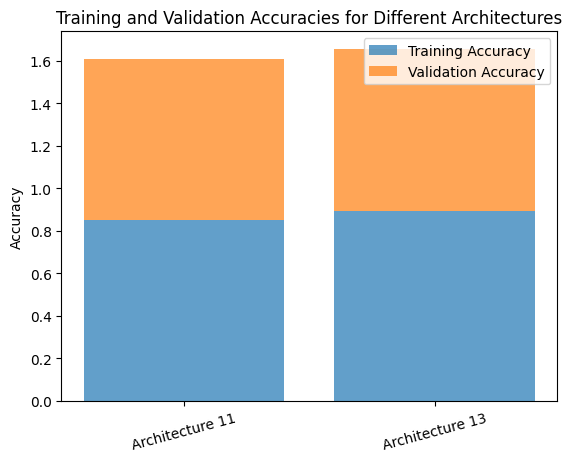


Detailed Results:
Architecture 11: Training Accuracy = 0.8534, Validation Accuracy = 0.7525
Architecture 13: Training Accuracy = 0.8935, Validation Accuracy = 0.7617


In [ ]:
# Define the architectures
def architecture_11():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_13():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

# Collect results
results = {}
architectures = {
    "Architecture 11": architecture_10,
    "Architecture 13": architecture_11,
}

for name, model_fn in architectures.items():
    train_acc, val_acc = create_and_train_model(name, model_fn, epochs=100)
    results[name] = {'train_acc': train_acc, 'val_acc': val_acc}

# Plot the results
names = list(results.keys())
train_accuracies = [results[name]['train_acc'] for name in names]
val_accuracies = [results[name]['val_acc'] for name in names]

plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training Accuracy = {metrics['train_acc']:.4f}, Validation Accuracy = {metrics['val_acc']:.4f}")


Training Architecture 11...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3031 - loss: 1.9200 - val_accuracy: 0.4437 - val_loss: 1.5340
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4678 - loss: 1.4936 - val_accuracy: 0.5012 - val_loss: 1.3692
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5290 - loss: 1.3270 - val_accuracy: 0.5598 - val_loss: 1.2424
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5813 - loss: 1.1883 - val_accuracy: 0.5969 - val_loss: 1.1444
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6200 - loss: 1.0837 - val_accuracy: 0.6119 - val_loss: 1.0903
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6474 - loss: 1.0032 - val_accuracy: 0.6569 - val_loss: 0.9752
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6770 - loss: 0.9338 - val_accuracy: 0.6609 - val_loss: 0.9778
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/

Architecture 11 saved as Architecture 11.h5

Training Architecture 13...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2757 - loss: 1.9461 - val_accuracy: 0.4480 - val_loss: 1.5250
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.4896 - loss: 1.4007 - val_accuracy: 0.5179 - val_loss: 1.3545
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5783 - loss: 1.1891 - val_accuracy: 0.6171 - val_loss: 1.0662
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6445 - loss: 1.0067 - val_accuracy: 0.6440 - val_loss: 1.0054
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6861 - loss: 0.8917 - val_accuracy: 0.6824 - val_loss: 0.9076
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7261 - loss: 0.7864 - val_accuracy: 0.7000 - val_loss: 0.8847
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7533 - loss: 0.7114 - val_accuracy: 0.7197 - val_loss: 0.8157
Epo

Architecture 13 saved as Architecture 13.h5


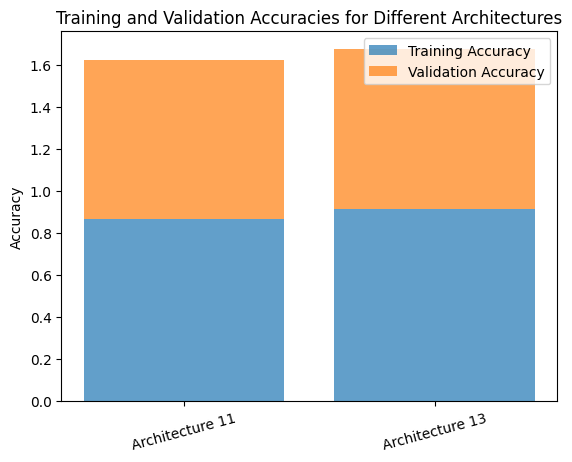


Detailed Results:
Architecture 11: Training Accuracy = 0.8687, Validation Accuracy = 0.7526
Architecture 13: Training Accuracy = 0.9144, Validation Accuracy = 0.7613


In [ ]:
# Define the architectures
def architecture_13():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))  # Directly use LeakyReLU as a layer
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def architecture_13():
    model = Sequential()
    # Block 1
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 4
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 5
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

# Collect results
results = {}
architectures = {
    "Architecture 11": architecture_10,
    "Architecture 13": architecture_11,
}

for name, model_fn in architectures.items():
    train_acc, val_acc = create_and_train_model(name, model_fn, epochs=100)
    results[name] = {'train_acc': train_acc, 'val_acc': val_acc}

# Plot the results
names = list(results.keys())
train_accuracies = [results[name]['train_acc'] for name in names]
val_accuracies = [results[name]['val_acc'] for name in names]

plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training Accuracy = {metrics['train_acc']:.4f}, Validation Accuracy = {metrics['val_acc']:.4f}")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import glob

# Load CIFAR-10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

#List of saved model filenames and their corresponding architecture names
model_filenames = [
    ("/content/drive/MyDrive/Architecture 0.h5", "Architecture 0"),
    ("/content/drive/MyDrive/Architecture 1.h5", "Architecture 1"),
    ("/content/drive/MyDrive/Architecture 2.h5", "Architecture 2"),
    ("/content/drive/MyDrive/Architecture 3.h5", "Architecture 3"),
    ("/content/drive/MyDrive/Architecture 4.h5", "Architecture 4"),
    ("/content/drive/MyDrive/Architecture 5.h5", "Architecture 5"),
    ("/content/drive/MyDrive/Architecture 6.h5", "Architecture 6"),
    ("/content/drive/MyDrive/Architecture 7.h5", "Architecture 7"),
    ("/content/drive/MyDrive/Architecture 8.h5", "Architecture 8"),
    ("/content/drive/MyDrive/Architecture 9.h5", "Architecture 9"),
    ("/content/drive/MyDrive/Architecture 10.h5", "Architecture 10"),
    ("/content/drive/MyDrive/Architecture 11.h5", "Architecture 11"),
    ("/content/drive/MyDrive/Architecture 12.h5", "Architecture 12"),
    ("/content/drive/MyDrive/Architecture 13.h5", "Architecture 13"),
]

# directory_path = "/content/drive/MyDrive/"
# model_filenames = [
#     (file_path, file_path.split("/")[-1].replace(".h5", ""))
#     for file_path in glob.glob(f"{directory_path}Architecture *.h5")
# ]

# Evaluate each model
results = {}
for filename, name in model_filenames:
    model = load_model(filename)
    train_score = model.evaluate(x_train, y_train_class, verbose=0)
    val_score = model.evaluate(x_test, y_test_class, verbose=0)
    results[name] = {
        "train_loss": train_score[0],
        "train_accuracy": train_score[1],
        "val_loss": val_score[0],
        "val_accuracy": val_score[1],
    }

# Extract metrics for plotting
names = list(results.keys())
train_accuracies = [results[name]["train_accuracy"] for name in names]
val_accuracies = [results[name]["val_accuracy"] for name in names]

# Plot the results
plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Training Loss = {metrics['train_loss']:.4f}, Training Accuracy = {metrics['train_accuracy']:.4f}")
    print(f"  Validation Loss = {metrics['val_loss']:.4f}, Validation Accuracy = {metrics['val_accuracy']:.4f}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/Architecture 0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Task1 second trail


In [39]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, LeakyReLU
from keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize and preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

In [40]:
# Function to create and train a model
def create_and_train_model(architecture_name, model_fn, epochs=10, batch_size=32):
    print(f"\nTraining {architecture_name}...")

    # Create a new optimizer for each model
    opt = RMSprop(learning_rate=0.0001, decay=1e-6)

    # Build and compile the model
    model = model_fn()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #apply early_stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model and collect training history
    history = model.fit(
        x_train, y_train_class,
        batch_size=batch_size,
        epochs=epochs,
        callbacks = [early_stopping],
        validation_data=(x_test, y_test_class),
        verbose=1
    )

    # Save the model
    model.save(f"/content/drive/MyDrive/DeepLearning/Task1/{architecture_name}.h5")
    print(f"{architecture_name} saved as {architecture_name}.h5")

    # Return training and validation accuracies
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    return train_acc, val_acc

In [41]:
def architecture_0():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_0", architecture_0, epochs=100)


Training Architecture_0...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2026 - loss: 2.1921 - val_accuracy: 0.3596 - val_loss: 1.8605
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3705 - loss: 1.8205 - val_accuracy: 0.4082 - val_loss: 1.7176
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4105 - loss: 1.6916 - val_accuracy: 0.4225 - val_loss: 1.6460
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4330 - loss: 1.6216 - val_accuracy: 0.4477 - val_loss: 1.5778
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4491 - loss: 1.5799 - val_accuracy: 0.4617 - val_loss: 1.5402
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4625 - loss: 1.5355 - val_accuracy: 0.4642 - val_loss: 1.5259
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4728 - loss: 1.5041 - val_accuracy: 0.4732 - val_loss: 1.4948
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step 

Architecture_0 saved as Architecture_0.h5


In [44]:
# More filters
# more complex and may require more data and computational resources
def architecture_1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_1", architecture_1, epochs=100)


Training Architecture_1...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2426 - loss: 2.1013 - val_accuracy: 0.3951 - val_loss: 1.7369
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4078 - loss: 1.7074 - val_accuracy: 0.4490 - val_loss: 1.5771
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4533 - loss: 1.5621 - val_accuracy: 0.4799 - val_loss: 1.4837
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4844 - loss: 1.4711 - val_accuracy: 0.4938 - val_loss: 1.4185
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5080 - loss: 1.4019 - val_accuracy: 0.5195 - val_loss: 1.3628
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5314 - loss: 1.3399 - val_accuracy: 0.5377 - val_loss: 1.3249
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5438 - loss: 1.3052 - val_accuracy: 0.5441 - val_loss: 1.2954
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5623 - loss: 

Architecture_1 saved as Architecture_1.h5


In [48]:
#increasing num of filters, balance
def architecture_2():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_2", architecture_2, epochs=100)


Training Architecture_2...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2412 - loss: 2.1204 - val_accuracy: 0.3695 - val_loss: 1.8328
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3778 - loss: 1.7958 - val_accuracy: 0.4230 - val_loss: 1.6763
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4279 - loss: 1.6528 - val_accuracy: 0.4562 - val_loss: 1.5630
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4635 - loss: 1.5398 - val_accuracy: 0.4683 - val_loss: 1.5120
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4860 - loss: 1.4787 - val_accuracy: 0.5008 - val_loss: 1.4480
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5074 - loss: 1.4230 - val_accuracy: 0.5017 - val_loss: 1.4362
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5229 - loss: 1.3780 - val_accuracy: 0.5204 - val_loss: 1.3769
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step 

Architecture_2 saved as Architecture_2.h5


In [49]:
#More conv layers
def architecture_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_3", architecture_3, epochs=100)


Training Architecture_3...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2139 - loss: 2.1452 - val_accuracy: 0.3743 - val_loss: 1.7893
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3816 - loss: 1.7428 - val_accuracy: 0.4257 - val_loss: 1.6124
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4319 - loss: 1.5940 - val_accuracy: 0.4641 - val_loss: 1.5036
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4608 - loss: 1.5060 - val_accuracy: 0.4787 - val_loss: 1.4495
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4858 - loss: 1.4476 - val_accuracy: 0.4967 - val_loss: 1.4086
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5046 - loss: 1.3967 - val_accuracy: 0.5098 - val_loss: 1.3746
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5217 - loss: 1.3632 - val_accuracy: 0.5125 - val_loss: 1.3736
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5341 - loss: 1

Architecture_3 saved as Architecture_3.h5


In [51]:
#More conv layers
def architecture_4():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_4", architecture_4, epochs=100)


Training Architecture_4...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2375 - loss: 2.0631 - val_accuracy: 0.3899 - val_loss: 1.6795
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.3957 - loss: 1.6428 - val_accuracy: 0.4487 - val_loss: 1.5197
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4531 - loss: 1.5068 - val_accuracy: 0.4819 - val_loss: 1.4352
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4883 - loss: 1.4151 - val_accuracy: 0.4986 - val_loss: 1.3708
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5194 - loss: 1.3389 - val_accuracy: 0.5170 - val_loss: 1.3673
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5440 - loss: 1.2796 - val_accuracy: 0.5654 - val_loss: 1.2233
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5592 - loss: 1.2281 - val_accuracy: 0.5620 - val_loss: 1.2192
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5833 - lo

Architecture_4 saved as Architecture_4.h5


In [54]:
def architecture_5():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_5", architecture_5, epochs=100)


Training Architecture_5...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.2653 - loss: 2.0122 - val_accuracy: 0.4346 - val_loss: 1.5796
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4502 - loss: 1.5287 - val_accuracy: 0.5045 - val_loss: 1.3659
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5108 - loss: 1.3595 - val_accuracy: 0.5037 - val_loss: 1.4023
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5561 - loss: 1.2515 - val_accuracy: 0.5515 - val_loss: 1.2553
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5872 - loss: 1.1684 - val_accuracy: 0.5935 - val_loss: 1.1438
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6139 - loss: 1.1028 - val_accuracy: 0.5997 - val_loss: 1.1252
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6393 - loss: 1.0268 - val_accuracy: 0.6416 - val_loss: 1.0197
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6611 -

Architecture_5 saved as Architecture_5.h5


In [55]:
def architecture_6():
    model = Sequential()
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_6", architecture_6, epochs=100)


Training Architecture_6...
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.2867 - loss: 1.9426 - val_accuracy: 0.4916 - val_loss: 1.4394
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4971 - loss: 1.4084 - val_accuracy: 0.5587 - val_loss: 1.2499
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5890 - loss: 1.1560 - val_accuracy: 0.5993 - val_loss: 1.1177
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6522 - loss: 0.9997 - val_accuracy: 0.6657 - val_loss: 0.9534
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6926 - loss: 0.8835 - val_accuracy: 0.6897 - val_loss: 0.9159
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7285 - loss: 0.7864 - val_accuracy: 0.7049 - val_loss: 0.8596
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7546 - loss: 0.7094 - val_accuracy: 0.7145 - val_loss: 0.8324
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━

Architecture_6 saved as Architecture_6.h5


In [ ]:
def architecture_7():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # 16x16
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # 8x8
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # 4x4
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # 2x2
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

train_acc, val_acc = create_and_train_model("Architecture_7", architecture_7, epochs=100)


Training Architecture_7...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.2780 - loss: 1.9445 - val_accuracy: 0.4476 - val_loss: 1.4743
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.4832 - loss: 1.4235 - val_accuracy: 0.5417 - val_loss: 1.2752
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5800 - loss: 1.1812 - val_accuracy: 0.5450 - val_loss: 1.2649
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6356 - loss: 1.0284 - val_accuracy: 0.6189 - val_loss: 1.1334
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6802 - loss: 0.9034 - val_accuracy: 0.6479 - val_loss: 0.9907
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7198 - loss: 0.7930 - val_accuracy: 0.6589 - val_loss: 0.9833
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7555 - loss: 0.7022 - val_accuracy: 0.7162 - val_loss: 0.8299
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.78

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import glob

# Load CIFAR-10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

#List of saved model filenames and their corresponding architecture names
model_filenames = [
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_0.h5", "Architecture 0"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_1.h5", "Architecture 1"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_2.h5", "Architecture 2"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_3.h5", "Architecture 3"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_4.h5", "Architecture 4"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_5.h5", "Architecture 5"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_6.h5", "Architecture 6"),
    ("/content/drive/MyDrive/DeepLearning/Task1/Architecture_7.h5", "Architecture 7"),
]

# directory_path = "/content/drive/MyDrive/"
# model_filenames = [
#     (file_path, file_path.split("/")[-1].replace(".h5", ""))
#     for file_path in glob.glob(f"{directory_path}Architecture *.h5")
# ]

# Evaluate each model
results = {}
for filename, name in model_filenames:
    model = load_model(filename)
    train_score = model.evaluate(x_train, y_train_class, verbose=0)
    val_score = model.evaluate(x_test, y_test_class, verbose=0)
    results[name] = {
        "train_loss": train_score[0],
        "train_accuracy": train_score[1],
        "val_loss": val_score[0],
        "val_accuracy": val_score[1],
    }

# Extract metrics for plotting
names = list(results.keys())
train_accuracies = [results[name]["train_accuracy"] for name in names]
val_accuracies = [results[name]["val_accuracy"] for name in names]

# Plot the results
plt.bar(names, train_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(names, val_accuracies, label='Validation Accuracy', alpha=0.7, bottom=train_accuracies)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Training Loss = {metrics['train_loss']:.4f}, Training Accuracy = {metrics['train_accuracy']:.4f}")
    print(f"  Validation Loss = {metrics['val_loss']:.4f}, Validation Accuracy = {metrics['val_accuracy']:.4f}")



---
---

## Task 2: Regression

Now we face a regression task instead of a classification problem. Loss function, activations, and dataset will change in the following task. Thus, instead of having one vector with the probabilities of each class, in this regression problem, the output is a single scalar.

For this second task, we chose the task of estimating house prices based on input images. To get the data run the following script, which clones Ahmed and Moustafa’s [repository](https://github.com/emanhamed/Houses-dataset) into colmap.

In [8]:
!git clone https://github.com/emanhamed/Houses-dataset
%cd /content/Houses-dataset/Houses\ Dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165 (from 1)
Receiving objects: 100% (2166/2166), 176.26 MiB | 22.57 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/Houses-dataset/Houses Dataset


This dataset contains four images of the house (kitchen, frontal, bedroom and bathroom), and attributes (number of bedrooms, number of bathrooms, zip code...). For our exercise, we only use the images of the house. We start with front door images.

We have selected frontal images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.


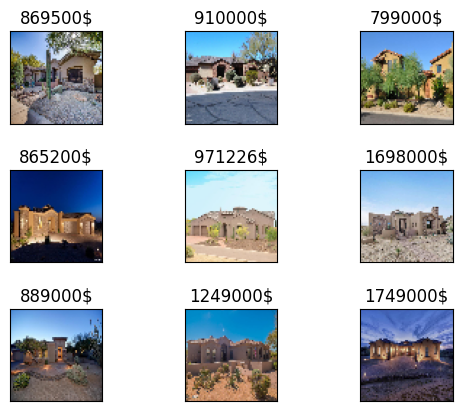

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed

house_section = 'frontal' # select between: kitchen, frontal, bedroom or bathroom
print('We have selected {} images. You can switch to the kitchen, frontal, bedroom or bathroom images by changing house_section variable.'.format(house_section))
images = []
for i_im in range(1, 536):
  image = cv2.imread(str(i_im)+'_'+house_section+'.jpg')
  image = cv2.resize(image, (64, 64))
  images.append(image)

labels = []
f = open('HousesInfo.txt', "r")
for x in f:
  label = (x).split(' ')[-1].split('\n')[0]
  labels.append(label)

# Let's visualize some examples
N=3
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    tmp = cv2.cvtColor(images[idx],cv2.COLOR_BGR2RGB)
    axes[row,col].imshow(tmp, cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    target = int(labels[idx])
    axes[row,col].set_title(str(target) + '$')
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

Prepare the dataset for training the model:

In [29]:
seed(1234)
images = np.asarray(images).astype('float32')
labels = np.asarray(labels).astype('float32')

# Normalize the image
max_price = labels.max()
images /= 255.
labels /= max_price

random_idx = np.random.permutation(len(images))
images = images[random_idx]
labels = labels[random_idx]

split_size_val = int(0.8*len(images))
X_train, X_val = images[:split_size_val], images[split_size_val+1:]
Y_train, Y_val = labels[:split_size_val], labels[split_size_val+1:]

# Print shape of training and val images
print('X_train image shape: {0}'.format(X_train.shape))
print('X_val image shape: {0}'.format(X_val.shape))

# Print shape of training and val labels
print('Y_train labels shape: {0}'.format(Y_train.shape))
print('Y_val labels shape: {0}'.format(Y_val.shape))

X_train image shape: (428, 64, 64, 3)
X_val image shape: (106, 64, 64, 3)
Y_train labels shape: (428,)
Y_val labels shape: (106,)


### Problem Definition

Similar to the previous task, you are asked to design a CNN architecture able to perform the estimation of house prices based on the `frontal` house image. Design a new model by changing parameters such as the number of convolutional layers, activation functions, strides, or pooling operators, among others.

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten
tf.random.set_seed(1234)

chanDim = -1
model = Sequential()

# . . .


# Define here your architecture


# . . .

model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mean_absolute_percentage_error'])

# train the model
print("[INFO] training model...")
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

In [22]:
from keras.optimizers import Adam

def create_and_train_model_t2(architecture_name, model_fn, epochs=100, batch_size=32):
    print(f"\nTraining {architecture_name}...")

    # Create a new optimizer for each model
    opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)

    # Build and compile the model
    model = model_fn()
    model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mean_absolute_percentage_error'])

    # Apply early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model and collect training history
    history = model.fit(
        X_train, Y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping],
        validation_data=(X_val, Y_val),
        verbose=1
    )

    # Save the model
    model.save(f"/content/drive/MyDrive/DeepLearning/02/Task2/{architecture_name}.h5")
    print(f"{architecture_name} saved as {architecture_name}.h5")

    # Return training and validation accuracies
    train_mape = history.history['mean_absolute_percentage_error'][-1]
    val_mape = history.history['val_mean_absolute_percentage_error'][-1]
    return train_mape, val_mape

In [35]:
def t2_archi_0():
    model = Sequential()

    # Block 1
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(64, 64, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2 32x32
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3 16x16
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 4 8x8
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 5 4x4
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 6 2x2
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    print(model.output_shape)

    # Fully connected layers for regression
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))  # Single output for house price regression

    # Model summary
    model.summary()

    return model


Training t2_archi_0...
(None, 1, 1, 512)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_64 (LeakyReLU)           │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 64, 64, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_65 (LeakyReLU)           │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_66 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_67 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_68 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_69 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_70 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_71 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_72 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,853,649 (29.96 MB)

 Trainable params: 7,853,649 (29.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 353.9929 - mean_absolute_percentage_error: 353.9929 - val_loss: 67.1567 - val_mean_absolute_percentage_error: 67.1567
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71.0828 - mean_absolute_percentage_error: 71.0828 - val_loss: 66.1739 - val_mean_absolute_percentage_error: 66.1739
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 73.6534 - mean_absolute_percentage_error: 73.6534 - val_loss: 64.6555 - val_mean_absolute_percentage_error: 64.6555
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 72.3511 - mean_absolute_percentage_error: 72.3511 - val_loss: 69.5922 - val_mean_absolute_percentage_error: 69.5922
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 144.9946 - mean_absolute_percentage_error: 144.9946 - val_loss: 73.1032 - val_mean_absolute_percentage_error: 73.1032
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 70.7547 - mean_absolute_percentage_error: 70.7547 - va

t2_archi_0 saved as t2_archi_0.h5


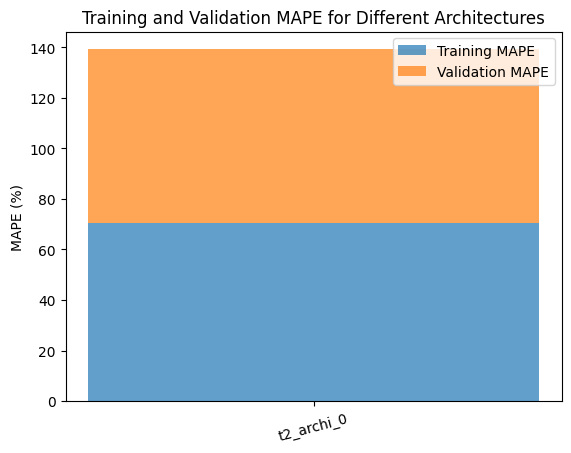


Detailed Results:
t2_archi_0: Training MAPE = 70.30%, Validation MAPE = 68.93%


In [37]:
# Collect results
results = {}
architectures = {
    "t2_archi_0": t2_archi_0,
}

for name, model_fn in architectures.items():
    train_mape, val_mape = create_and_train_model_t2(name, model_fn, epochs=100)
    results[name] = {'train_mape': train_mape, 'val_mape': val_mape}

names = list(results.keys())
train_mape = [results[name]['train_mape'] for name in names]
val_mape = [results[name]['val_mape'] for name in names]

plt.bar(names, train_mape, label='Training MAPE', alpha=0.7)
plt.bar(names, val_mape, label='Validation MAPE', alpha=0.7, bottom=train_mape)
plt.ylabel('MAPE (%)')
plt.title('Training and Validation MAPE for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}: Training MAPE = {metrics['train_mape']:.2f}%, Validation MAPE = {metrics['val_mape']:.2f}%")


In [33]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import glob

# Load CIFAR-10 dataset and preprocess it
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

# List of saved model filenames and their corresponding architecture names
model_filenames = [
    ("/content/drive/MyDrive/DeepLearning/02/Task2/t2_archi_0.h5", "t2_archi_0"),
]

# Evaluate each model
results = {}
for filename, name in model_filenames:
    model = load_model(filename)
    train_score = model.evaluate(x_train, y_train_class, verbose=0)
    val_score = model.evaluate(x_test, y_test_class, verbose=0)
    results[name] = {
        "train_mape": train_score[1],  # Assuming MAPE is the second metric
        "val_mape": val_score[1],
    }

# Extract metrics for plotting
names = list(results.keys())
train_mape = [results[name]["train_mape"] for name in names]
val_mape = [results[name]["val_mape"] for name in names]

# Plot the results
plt.bar(names, train_mape, label='Training MAPE', alpha=0.7)
plt.bar(names, val_mape, label='Validation MAPE', alpha=0.7, bottom=train_mape)
plt.ylabel('MAPE (%)')
plt.title('Training and Validation MAPE for Different Architectures')
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Print detailed results
print("\nDetailed Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Training MAPE = {metrics['train_mape']:.4f}%")
    print(f"  Validation MAPE = {metrics['val_mape']:.4f}%")

ValueError: Exception encountered when calling AveragePooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_3_1/average_pooling2d_2_1/AvgPool}} = AvgPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_3_1/leaky_re_lu_47_1/LeakyRelu)' with input shapes: [?,1,1,512].[0m

Arguments received by AveragePooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 512), dtype=float32)

The metric used in this problem to evaluate the performance is the same we used for training the model, the mean absolute percentage error. Mean absolute percentage error is defined as $\frac{100}{n} \sum_n \frac{|\hat{y} - y|}{|y|}$ where $y$ is the ground-truth, $\hat{y}$ is the estimation of the model and `n` the number of elements in the set we are evaluating.

In [ ]:
prices_predicted = model.predict(X_val).flatten()
diff = ((prices_predicted - Y_val) / Y_val) * 100
error_mean = np.mean(np.abs(diff))

print("Predicting house prices - Estimation Error: {:.2f}%".format(error_mean))

**Report**:


*   Propose a CNN architecture that has an estimation error in the validation set below 75%.
*   Present a figure showing the training and validation loss vs the number of training epochs for different architectural design choices. Discuss the gap between the training and validation loss depending on the proposed architecture.
*   Report a table with results when using any of the other images from the house (kitchen, bedroom, and bathroom).